In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ufo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Verzeo/ufo-200520-125601.csv")
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [7]:
#SHAPES and COLORS reported
#Can be used to find correlations
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [8]:
#For a time graph.
###How does this affect the size?
#date = ufo.iloc[1:18241,4]
#date

In [9]:
#ufo = pd.to_datetime(date)

In [10]:
ufo.iloc[0:4]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [11]:
#Reassuring it's sorted according to date
ufo.sort_index(inplace=True)
ufo[1:60]

,City,Colors Reported,Shape Reported,State,Time
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00
10,Fontana,NaN,LIGHT,CA,8/15/1937 21:00


What color did they see? A dramatically higher amounts of shapes over colors.\
It might have been in the hueless monochromatic range. Hm...\
Maybe the 'Lights weren't noted.\
I need to search how to search on it haha

In [12]:
#Seperated the year column from date 
#pd.DatetimeIndex(Column).(The unit) this uses the datetime64 object/dtype.
ufo['Year'] = pd.DatetimeIndex(ufo['Time']).year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,1933


In [13]:
ufo.info()
ufo.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
 5   Year             18241 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 855.2+ KB


,Year
count,18241.000000
mean,1989.435009
std,12.698652
min,1930.000000
25%,1981.000000
50%,1996.000000
75%,1999.000000
max,2000.000000


Ufo sightings increase exponentially from 1930-2000

In [14]:
ufo.loc[1930]

City               Colorado Springs
Colors Reported                 NaN
Shape Reported                  NaN
State                            CO
Time                 2/15/1970 0:00
Year                           1970
Name: 1930, dtype: object

In [15]:
ufo_state = ufo.set_index('State').sort_index()
ufo_state.head()

,City,Colors Reported,Shape Reported,Time,Year
State,,,,,
AK,Anchorage,NaN,CYLINDER,6/30/1997 12:00,1997
AK,Seward,NaN,LIGHT,9/2/1999 21:00,1999
AK,Kodiak Island,NaN,CIRCLE,6/15/1977 2:00,1977
AK,Anchorage,NaN,DISK,6/10/1949 21:00,1949
AK,Nulato,NaN,LIGHT,6/15/1975 18:30,1975


In [16]:
#df.loc[row_slice, column_slice]
ufo.loc[0:5]

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,1933
5,Valley City,NaN,DISK,ND,9/15/1934 15:30,1934


In [17]:
#Matplotlib as plt

def Scatter(x, y):
  return plt.scatter(ufo[str(x)], ufo[str(y)])

def Plot(x, y):
  return plt.plot(ufo[x], ufo[y])

In [18]:
States = {}
for x in ufo['State']:
  if x in States:
    States[x] += 1
  else:
    States[x] = 1
States

{'AK': 116,
 'AL': 193,
 'AR': 206,
 'AZ': 738,
 'CA': 2529,
 'CO': 367,
 'CT': 225,
 'Ca': 1,
 'DE': 43,
 'FL': 837,
 'Fl': 4,
 'GA': 325,
 'HI': 85,
 'IA': 162,
 'ID': 130,
 'IL': 613,
 'IN': 326,
 'KS': 176,
 'KY': 244,
 'LA': 174,
 'MA': 322,
 'MD': 215,
 'ME': 181,
 'MI': 591,
 'MN': 254,
 'MO': 448,
 'MS': 139,
 'MT': 144,
 'NC': 356,
 'ND': 51,
 'NE': 101,
 'NH': 125,
 'NJ': 370,
 'NM': 241,
 'NV': 284,
 'NY': 914,
 'OH': 667,
 'OK': 193,
 'OR': 534,
 'PA': 598,
 'RI': 67,
 'SC': 166,
 'SD': 57,
 'TN': 286,
 'TX': 1027,
 'UT': 193,
 'VA': 299,
 'VT': 44,
 'WA': 1322,
 'WI': 357,
 'WV': 132,
 'WY': 69}

In [19]:
import seaborn as sns

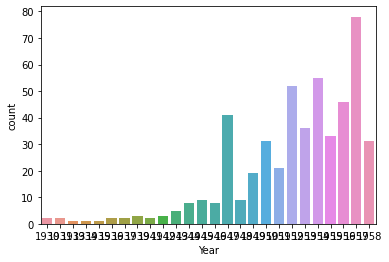

In [25]:
sns.countplot(x = 'Year', data = ufo.loc[0:500])